# Scikit-Learn의 문서 전처리 기능

## BOW 인코딩

문서를 숫자 벡터로 변환하는 가장 기본적인 방법은 BOW(Bag of Words) 인코딩 방법이다. BOW 인코딩 방법에서는 전체 문서 $\{d_1, d_2, \ldots, d_n\}$ 를 구성하는 고정된 단어장(vocabulary) $\{t_1, t_2, \ldots, t_m\}$ 를  만들고 $d_i$라는 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지를 표시하는 방법이다.

$$ x_{i,j} = \text{문서 $d_i$내의 단어 $t_j$의 출현 빈도} $$ 

또는

$$ x_{i,j} = 
\begin{cases}
0, & \text{만약 단어 $t_j$가 문서 $d_i$ 안에 없으면} \\
1. & \text{만약 단어 $t_j$가 문서 $d_i$ 안에 있으면}
\end{cases}
$$


## Scikit-Learn 문서 전처리 기능

Scikit-Learn의 `feature_extraction` 서브패키지와 `feature_extraction.text` 서브패키지는 다음과 같은 문서 전처리용 클래스를 제공한다.

* [`DictVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html):

  * 각 단어의 수를 세어놓은 사전에서 BOW 인코딩 벡터를 만든다.

* [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): 

  * 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.

* [`TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): 

  * `CountVectorizer`와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.

* [`HashingVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html): 

  * 해시 함수(hash function)을 사용하여 적은 메모리와 빠른 속도로 BOW 인코딩 벡터를 만든다.

### DictVectorizer

`DictVectorizer`는 `feature_extraction` 서브패키지에서 제공한다. 문서에서 단어의 사용 빈도를 나타내는 딕셔너리 정보를 입력받아 BOW 인코딩한 수치 벡터로 변환한다.

In [1]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [2]:
v.feature_names_

['A', 'B', 'C']

In [3]:
v.transform({'C': 4, 'D': 3})

array([[0., 0., 4.]])

### CountVectorizer

`CountVectorizer`는 다음과 같은 세가지 작업을 수행한다.

1. 문서를 토큰 리스트로 변환한다.
2. 각 문서에서 토큰의 출현 빈도를 센다.
3. 각 문서를 BOW 인코딩 벡터로 변환한다. 


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [5]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [6]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

`CountVectorizer`는 이러한 작업을 하기 위한 다음과 같은 인수를 가질 수 있다. 

* `stop_words` : 문자열 {‘english’}, 리스트 또는 None (디폴트)
 * stop words 목록.‘english’이면 영어용 스탑 워드 사용.
* `analyzer` : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수
 * 단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램 
* `token_pattern` : string
 * 토큰 정의용 정규 표현식 
* `tokenizer` : 함수 또는 None (디폴트)
 * 토큰 생성 함수 .
* `ngram_range` : (min_n, max_n) 튜플
 * n-그램 범위 
* `max_df` : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
 * 단어장에 포함되기 위한 최대 빈도
* `min_df` : 정수 또는 [0.0, 1.0] 사이의 실수.  디폴트 1
 * 단어장에 포함되기 위한 최소 빈도 


## Stop Words

Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다. `stop_words` 인수로 조절할 수 있다.

In [8]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [9]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

## 토큰

 `analyzer`, `tokenizer`, `token_pattern` 등의 인수로 사용할 토큰 생성기를 선택할 수 있다.

In [10]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [11]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

In [12]:
import nltk

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

## N그램

N그램은 단어장 생성에 사용할 토큰의 크기를 결정한다. 모노그램(monogram)은 토큰 하나만 단어로 사용하며 바이그램(bigram)은 두 개의 연결된 토큰을 하나의 단어로 사용한다.

In [13]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [14]:
vect = CountVectorizer(ngram_range=(1, 2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

## 빈도수

`max_df`, `min_df` 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다. 토큰의 빈도가 `max_df`로 지정한 값을 초과 하거나 `min_df`로 지정한 값보다 작은 경우에는 무시한다. 인수 값은 정수인 경우 횟수, 부동소수점인 경우 비중을 뜻한다. 

In [15]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [16]:
vect.transform(corpus).toarray().sum(axis=0)

array([4, 2, 3, 3])

## TF-IDF

TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법이다. 


구제적으로는 문서 $d$(document)와 단어 $t$ 에 대해 다음과 같이 계산한다.

$$ \text{tf-idf}(d, t) = \text{tf}(d, t) \cdot \text{idf}(t) $$


여기에서

* $\text{tf}(d, t)$: term frequency. 특정한 단어의 빈도수
* $\text{idf}(t)$ : inverse document frequency. 특정한 단어가 들어 있는 문서의 수에 반비례하는 수
 
 $$ \text{idf}(d, t) = \log \dfrac{n}{1 + \text{df}(t)} $$
 
* $n$ : 전체 문서의 수
* $\text{df}(t)$:  단어 $t$를 가진 문서의 수

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

## Hashing Trick

`CountVectorizer`는 모든 작업을 메모리 상에서 수행하므로 처리할 문서의 크기가 커지면 속도가 느려지거나 실행이 불가능해진다. 이 때  `HashingVectorizer`를 사용하면 해시 함수를 사용하여 단어에 대한 인덱스 번호를 생성하기 때문에 메모리 및 실행 시간을 줄일 수 있다.

In [18]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [19]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

CPU times: user 7.05 s, sys: 60 ms, total: 7.11 s
Wall time: 7.15 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=300000)

In [21]:
%time hv.transform(twenty.data)

CPU times: user 4.32 s, sys: 120 ms, total: 4.44 s
Wall time: 2.71 s


<11314x300000 sparse matrix of type '<class 'numpy.float64'>'
	with 1786336 stored elements in Compressed Sparse Row format>

## 예

다음은 Scikit-Learn의 문자열 분석기를 사용하여 웹사이트에 특정한 단어가 어느 정도 사용되었는지 빈도수를 알아보는 코드이다.

In [22]:
import warnings
warnings.simplefilter("ignore")

import json
import string
from urllib.request import urlopen
from konlpy.utils import pprint
from konlpy.tag import Hannanum

hannanum = Hannanum()

f = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
json = json.loads(f.read())

cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == "markdown"]
docs = [
    w for w in hannanum.nouns(" ".join(cell)) 
    if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))
]

여기에서는 하나의 문서가 하나의 단어로만 이루어져 있다. 따라서 `CountVectorizer`로 이 문서 집합을 처리하면  각 문서는 하나의 원소만 1이고 나머지 원소는 0인 벡터가 된다. 이 벡터의 합으로 빈도를 알아보았다.

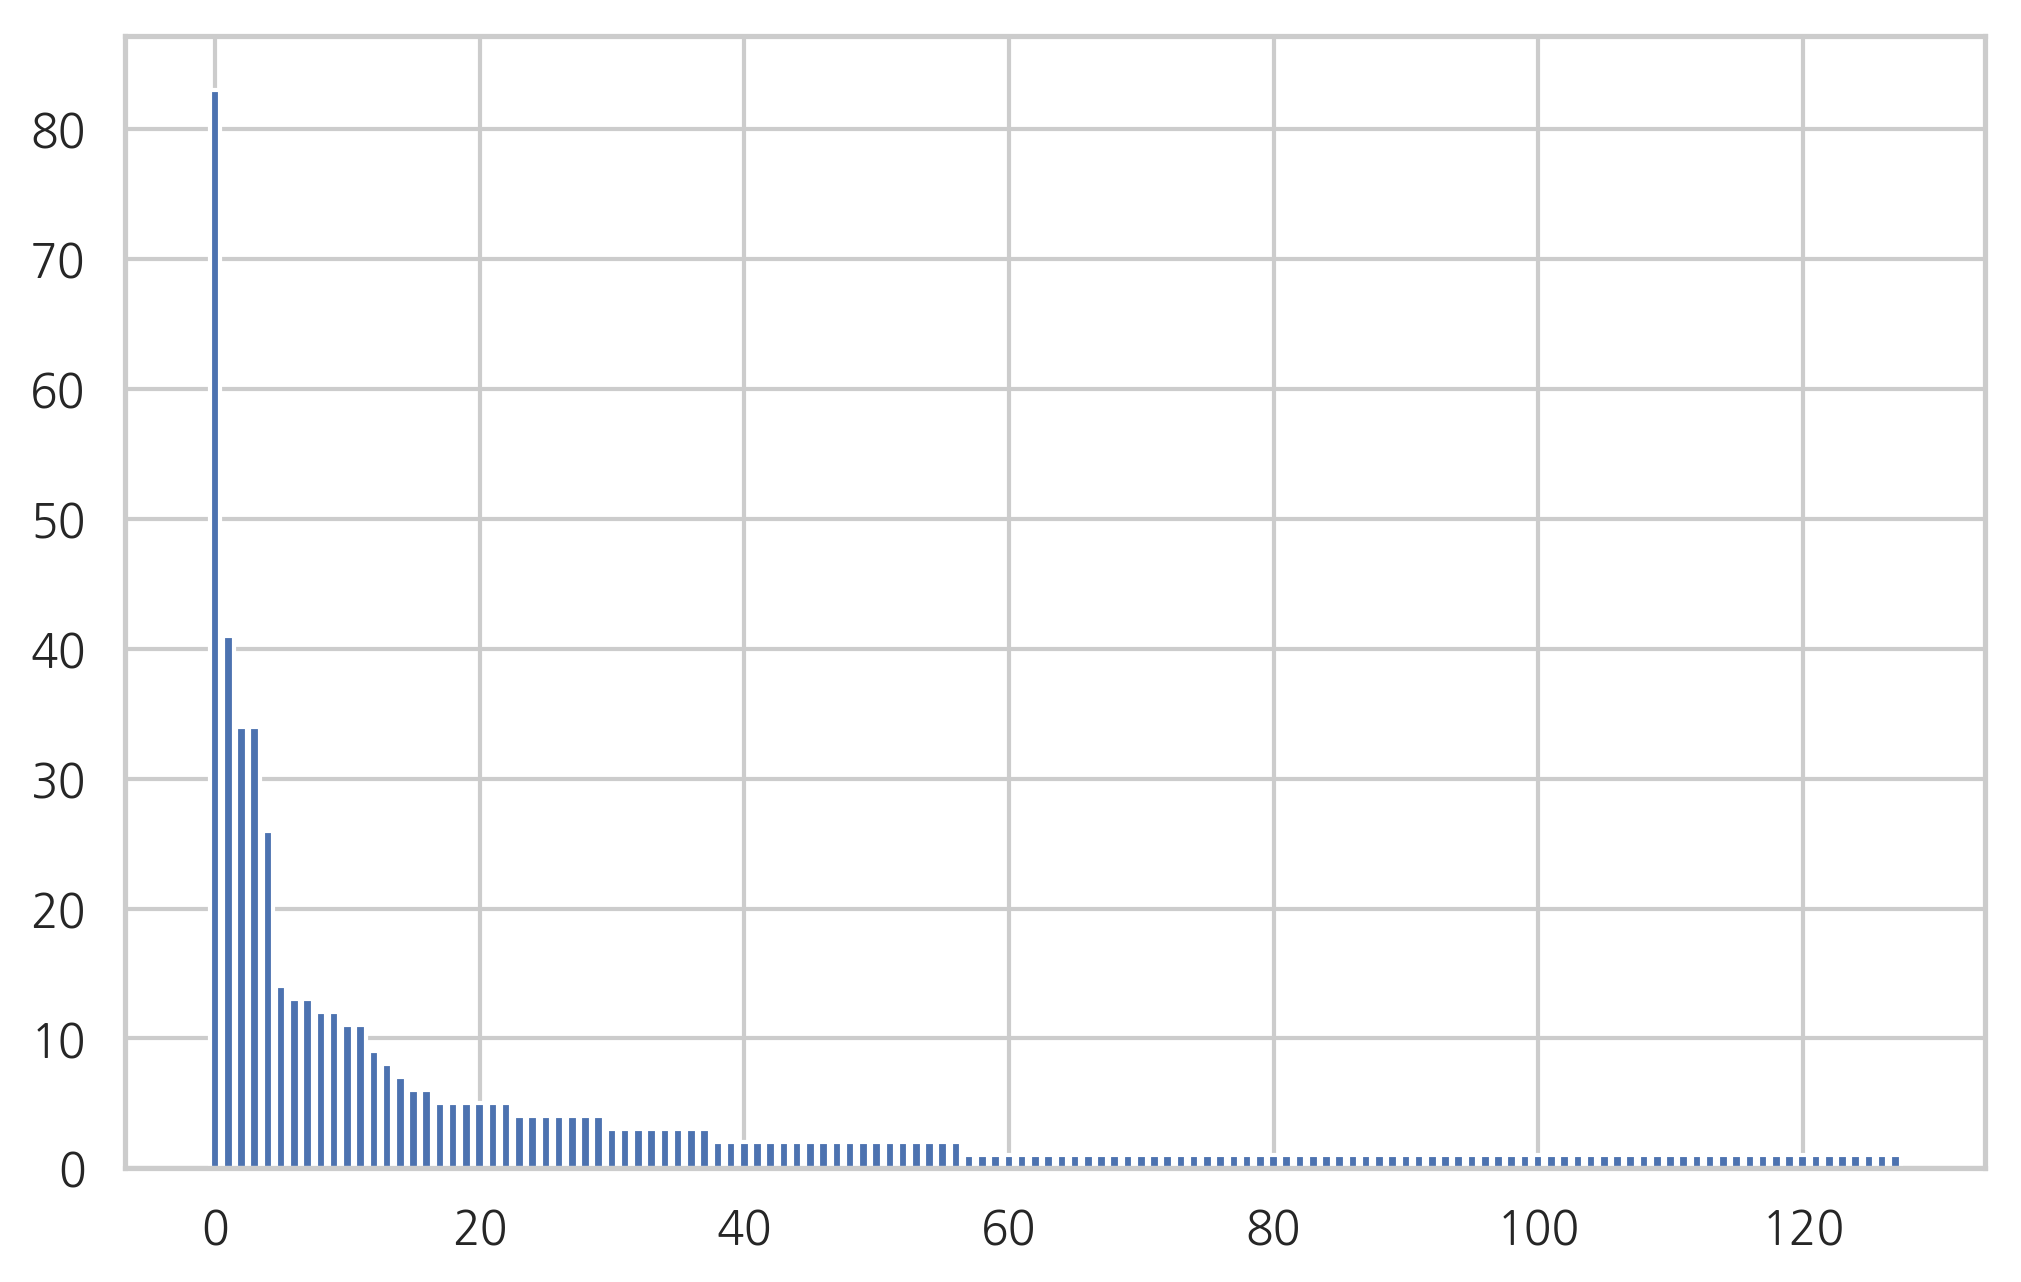

In [23]:
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()

In [24]:
pprint(list(zip(feature_name, count))[:10])

[('컨테이너', 83),
 ('도커', 41),
 ('명령', 34),
 ('이미지', 34),
 ('사용', 26),
 ('가동', 14),
 ('중지', 13),
 ('mingw64', 13),
 ('다음', 12),
 ('삭제', 12)]
